## $$\texttt{EMD4CPV} \text{ examples}$$

As described in the ``README.md`` the library is structured as a nested set of classes and subclasses. We'll go in sequential order and show some typical examples of usage from each level of the library using data from the B decays.

# $$\texttt{delta_Wq}$$

In [1]:
from delta_Wq import *

/home/tonym/.local/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Computing $\delta W_q$

In [2]:
# Path to data
B_data = 'data/m2_B_10e6.txt'
Bbar_data = 'data/m2_Bbar_CPC_10e6.txt'

# Desired size of datasets
N = 100
Nbar = 100
# Distance weighting parameters (single float or list of multiple floats)
q = [1.0, 2.0]
# Number of desired delta_Wq data samples in the generated ensemble
n_perm = 10000
# Manually set the file size (in bytes) or if None, the size will be computed
pool_len = None
# Mass of the decaying mother particle (for normalization of distances)
MASS_B = 5.279 # GeV

dWq_file_name = [rf'data/dWq_{qs}_data.txt' for qs in q]

# Instantiate the class instance --- in this case we will generate the CP conserving distribution via the master method
delta_W_B = delta_Wq(X_data = B_data, Xbar_data = Bbar_data, N_len = N, Nbar_len = Nbar, q = q, 
	pool_len = pool_len, mass = MASS_B, shuffle_or_master = 'master')

# To generate dWq data for a single value of q
#delta_W_B.generate_dWq(q = q, n_perm = n_perm, dWq_file_name = dWq_file_name,  save = True)

# Multiple dWq datasets can be generated via
"""
q_list = [1,3,5]
for q in q_list:
	delta_W_B.generate_dWq(q = q, n_perm = n_perm, dWq_file_name = dWq_file_name,  save = True)
"""

# OR
dWq = delta_W_B.get_dWq(n_perm = n_perm, dWq_file_name = dWq_file_name,  save = True)
dWq_1 = dWq[0]
dWq_2 = dWq[1]

q =  1.0


100%|████████████████████████████████████████████████████████| 10000/10000 [01:25<00:00, 116.59it/s]


q =  2.0


100%|████████████████████████████████████████████████████████| 10000/10000 [01:28<00:00, 113.34it/s]


In [3]:
# We now have two nested lists each containing N_perm N-dimensional delta Wq vectors
print(len(dWq_1)) # Should be N_perm = 1000
print(len(dWq_1[0])) # Should be N = 100
print(len(dWq_2)) # SHould be N_perm = 1000
print(len(dWq_2[0])) # Should be N = 100

10000
100
10000
100


### Computing Binned $\delta W_q$

In [4]:
# For the binned delta_Wq we need to specify the number of bins
n_bins = 10
# Also define the global minimum and maximum along each dimension
min_m2_Kpi   = 0.40113504811734657 
max_m2_Kpi   = 26.466396085341085
min_m2_Kpi0  = 0.3954690106651473
max_m2_Kpi0  = 26.419060970900613
min_m2_pipi0 = 0.07597782752685109
max_m2_pipi0 = 22.902839708619982
min_max_dictionary = {'m23':[min_m2_Kpi, max_m2_Kpi], 'm13':[min_m2_Kpi0, max_m2_Kpi0], 'm12':[min_m2_pipi0, max_m2_pipi0]}
print()
# Path to the delta Wq ensemble data
dWq_file_name = [rf'data/dWq_{qs}_binned_{n_bins}_data.txt' for qs in q]

# Now we can compute the binned version
dWq_binned = delta_W_B.get_binned_dWq(n_perm = n_perm, n_bins = n_bins, min_max_dictionary = min_max_dictionary, dWq_file_name = dWq_file_name,  save = True)
dWq_1_binned = dWq_binned[0]
dWq_2_binned = dWq_binned[1]


q =  1.0


100%|████████████████████████████████████████████████████████| 10000/10000 [01:27<00:00, 114.20it/s]


q =  2.0


100%|████████████████████████████████████████████████████████| 10000/10000 [01:28<00:00, 113.14it/s]


In [5]:
# We now have two nested lists each containing N_perm lists where these delta_Wq vectors may have variable length due
# to the dWq values not being bijective in the binned Wq
print(len(dWq_1_binned)) # Should be N_perm = 1000
print(len(dWq_1_binned[0])) # List items can be larger than the number of bins corresponding to a single bin distributing weight to more than one other bin
print(len(dWq_1_binned[1]))
print(len(dWq_1_binned[2]))

10000
20
11
17


### Computing $SW_q$

In [6]:
q = 1.0
N_slice = 1000
SWq_file_name = rf'data/SWq_{q}_slices_{N_slice}_data.txt'

SWq = delta_W_B.generate_SWq(n_perm, q = q, N_slices = N_slice, save = True, SWq_file_name = SWq_file_name)

100%|█████████████████████████████████████████████████████████| 10000/10000 [04:15<00:00, 39.11it/s]


# $$\texttt{delta_Wq_statistics}$$

In [7]:
from delta_Wq_statistics import *

In [8]:
# Now that we have the dWq distributions we can compute some test statistics, we'll focus on q = 1.0
q = 1.0

# Path to delta_Wq text file generated from delta_Wq
dWq_path = rf'data/dWq_{q}_data.txt'

# Instantiate a delta Wq statistics object
delta_W_B = delta_Wq_statistics(X_data = B_data, Xbar_data = Bbar_data, N_len = N, Nbar_len = Nbar, q = q, 
	pool_len = pool_len, mass = MASS_B, shuffle_or_master = 'master')

### $W_q$

In [9]:
q = 1.0
# For now, the single variable q must be placed within a list
statistic_manual = {'Wq':[q]}
write_path_Wq = rf'data/Wq_{q}.txt'

# You have the ability to generate the delta W data if not already generated...
#delta_W_B.generate_dWq(n_perm = n_perm, dWq_file_name = dWq_file_name,  save = True)

# Generate the statistic data and write to text file
delta_W_B.write_statistic_data(dWq_path, statistic_manual, write_path = write_path_Wq)

# Or, if you want to save the statistic values to RAM without writing them to a text file:
Wq = delta_W_B.get_statistic_list(dWq_1, statistic_key = 'Wq', statistic_parameters = [q])

### $I_q$

In [10]:
# q = 1.0
windows = [[-10.05, -6.80578076448301]] # +1 contribution to the windowed statistic
sills = []                              # -1 contribution to the windowed statistic

statistic_manual = {'log_IWq':[q, {'window': windows, 'sill': sills}]}

write_path_IWq =  rf'data/log_IWq_{q}.txt'

log_IWq = delta_W_B.write_statistic_data(dWq_path, statistic_manual, write_path = write_path_IWq)

Additional user-defined statistics can be implemented straightforwadly via additional functions added to ``delta_Wq_statistics.py``

# $$\texttt{delta_Wq_fit}$$

In [11]:
from delta_Wq_fit import *

In [12]:
q = 1.0
# When computing p-values, we will often obtain values of the test statistic which
# which lies outside the range of computed statistic values. To estimate p-values
# for these values we extrapolate based off of fit. These fits, and the error associated
# with their parameters can be obtained using this class.
Wq_path = rf'data/Wq_{q}_data.txt'

statistic_key_Wq = 'Wq'
# Desired fit distributions
fit_distribution_keys_Wq = ['gamma', 'skewnorm', 'johnsonsu', 'genextreme']
	
# Instantiate a delta W object
delta_W_B = delta_Wq_fit(X_data = B_data, Xbar_data = Bbar_data, N_len = N, Nbar_len = N, q = q, 
    pool_len = pool_len, mass = MASS_B, shuffle_or_master = 'master')

gamma
skewnorm
johnsonsu
genextreme
gamma chi2 = 1566.580596110012
skewnorm chi2 = 1629.1447213445774
johnsonsu chi2 = 786.8245847438866
genextreme chi2 = 1272.307499156134


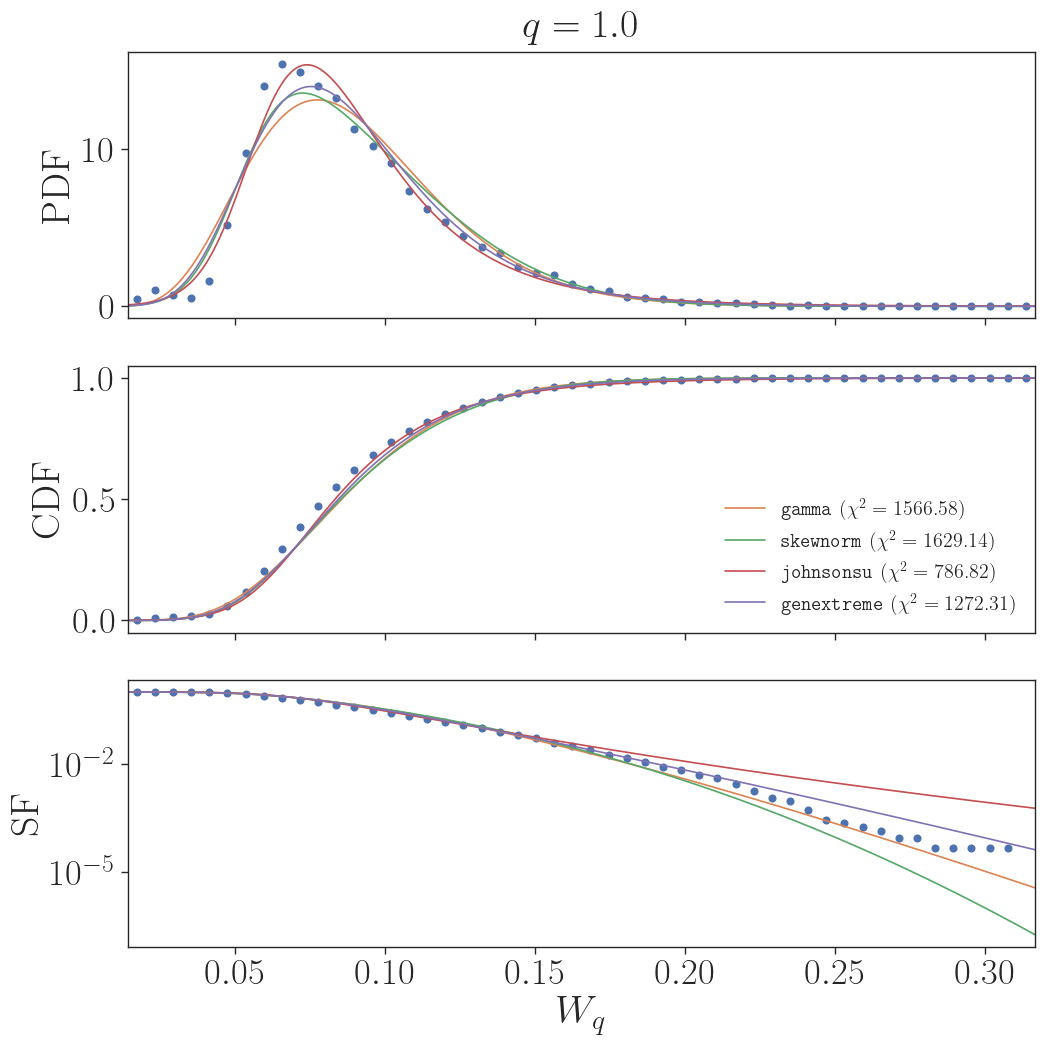

In [13]:
fit_data, bin_centers, counts, statistic_cdf, statistic_sf, min_stat, max_stat = delta_W_B.fit_statistic(statistic_key = statistic_key_Wq, statistic_data = Wq_path, fit_distribution_keys = fit_distribution_keys_Wq,  plot_details = True)

In [14]:
q = 2.0
# When computing p-values, we will often obtain values of the test statistic which
# which lies outside the range of computed statistic values. To estimate p-values
# for these values we extrapolate based off of fit. These fits, and the error associated
# with their parameters can be obtained using this class.
Wq_path = rf'data/Wq_{q}_data.txt'

statistic_key_Wq = 'Wq'
# Desired fit distributions
fit_distribution_keys_Wq = ['gamma', 'skewnorm', 'johnsonsu', 'genextreme']
	
# Instantiate a delta W object
delta_W_B = delta_Wq_fit(X_data = B_data, Xbar_data = Bbar_data, N_len = N, Nbar_len = N, q = q, 
    pool_len = pool_len, mass = MASS_B, shuffle_or_master = 'master')

gamma
skewnorm
johnsonsu
genextreme
gamma chi2 = 1688.139009344657
skewnorm chi2 = 1735.0235009179426
johnsonsu chi2 = 1015.5576758005582
genextreme chi2 = 2722.6854263547425


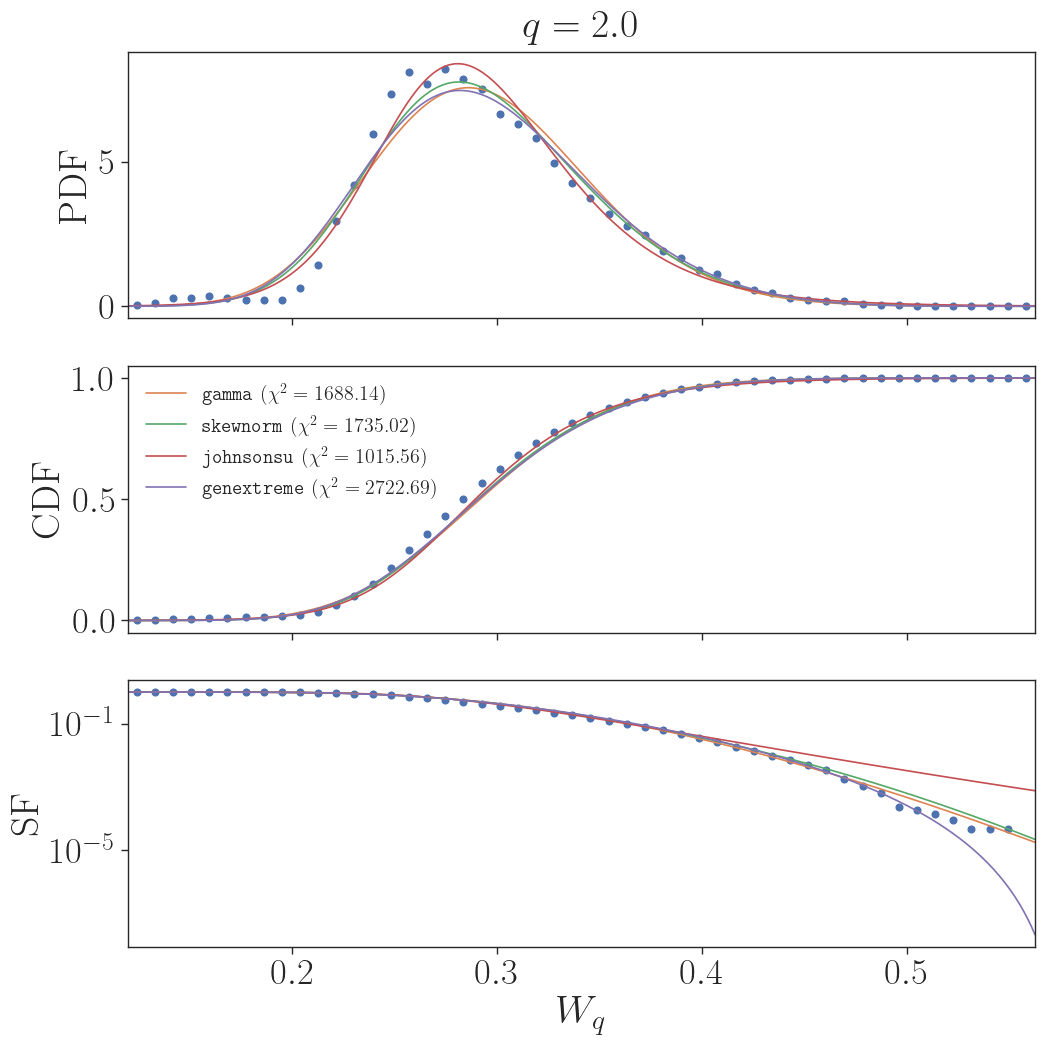

In [15]:
fit_data, bin_centers, counts, statistic_cdf, statistic_sf, min_stat, max_stat = delta_W_B.fit_statistic(statistic_key = statistic_key_Wq, statistic_data = Wq_path, fit_distribution_keys = fit_distribution_keys_Wq,  plot_details = True)

# $$\texttt{delta_Wq_versus}$$

In [16]:
from delta_Wq_versus import *

In [21]:
q_list = [1.0, 2.0]
Bbar_data = 'data/m2_Bbar_CPV_10e6.txt'

statistic_paths = {'Wq':[rf'data/Wq_{q}_data.txt' for q in q_list]}
statistic_fit_dictionary = {'Wq':['genextreme', 'johnsonsu']}
statistic_manual = {'Wq':[[q_list[i]] for i in range(len(q_list))]}

n_battles = 500

# Instantiate a delta W object
delta_W_B = delta_Wq_versus(X_data = B_data, Xbar_data = Bbar_data, N_len = N, Nbar_len = Nbar, q = q_list, 
	pool_len = pool_len, mass = MASS_B, shuffle_or_master = 'master', statistic_fit_dictionary = statistic_fit_dictionary)


keys:  dict_keys(['Wq'])
staistic path:  data/Wq_1.0_data.txt
staistic path:  data/Wq_2.0_data.txt
Contenders:  {'Wq': ['Wq_1.0', 'Wq_2.0']}


100%|█████████████████████████████████████████████████████████████| 500/500 [00:07<00:00, 64.10it/s]


2
[1.]
['Wq_1.0']
['Wq', '1.0']
['Wq_2.0']
['Wq', '2.0']
['$p(W_{1.0})$', '$p(W_{2.0})$']
Wq_1.0  vs  Wq_2.0
Writing  data/Wq_1.0_p.txt
Writing  data/Wq_2.0_p.txt


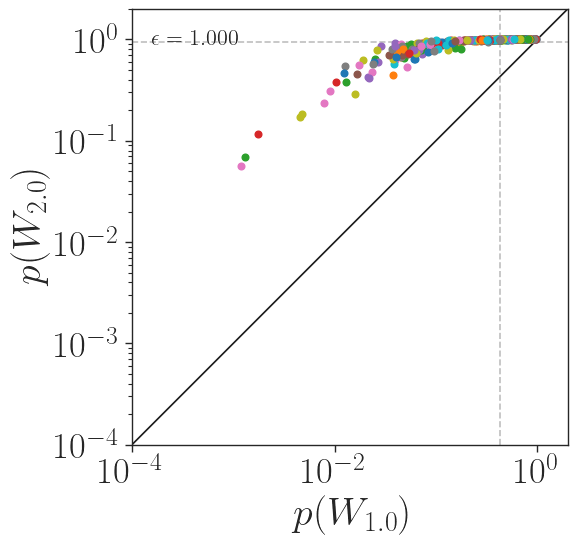

In [22]:
fig = delta_W_B.plot_battle(n_battles, statistic_manual, statistic_paths, save_p_vals = True, label = None, plot_w_errors = True)